In [2]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec


# Curve Fitting:

## $M_{BH} - \sigma_{*}$ Relation

In 2006, Greene and Ho [1] studied the characteristics of 88 galaxies to show that there is an apparent relationship between the stellar velocity dispersion$\sigma_{*}$ in a galaxy bulge and the mass $M_{HB}$ of the supermassive black hole at its center, as show in the next figure

<img src="figure2.png">

This know as the $M_{BH}-\sigma_{*}$ relation and is not yet completely understood.

* Make a plot of point showing $log_{10} M_{BH}$ as a function of $log_{10}\sigma_{*}$



In [3]:
data = ascii.read("table1.dat",readme="ReadMe")  
logσ = np.array(np.log10(data["sigma*"]))
logM = np.array(data["logM"])

x = logσ; y = logM


def plot(x,y):
    fig = plt.figure()

    gs = GridSpec(4,4)

    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])

    ax_joint.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
    ax_marg_x.hist(x,50,facecolor = "blue",alpha = 0.75)
    ax_marg_y.hist(y,50,facecolor = "blue",alpha = 0.75,orientation="horizontal")

    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    ax_joint.set_xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
    ax_joint.set_ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")

    ax_marg_y.set_xlabel('N')
    ax_marg_x.set_ylabel('N')


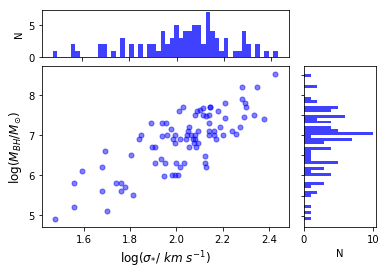

In [4]:
plot(x,y)

* Compute a linear regression to the data (Ignoring errors). Make a plot of data and fit. Compare your fit results to that of Greene & Ho (2006). (Maybe you will need some rescaling for a direct comparison.)

The simplest curve to fit some data is a straight line (linnear regression)

$$Y(x,\{a_{1},a_{2}\}) = a_{1}+a_{2}x$$

the coefficients of the linear regression are 

$$a_{1} = \frac{\sum y \sum x^{2}-\sum x \sum xy}{S \sum x^{2}-\left(\sum x\right)^{2}},\qquad a_{2} = \frac{S\sum xy- \sum y \sum x}{S\sum x^{2}-\left(\sum x\right)^{2}}$$

The associated error bar $\sigma^{2}_{a_{j}}$ for the curve fit parameter $a_{j}$. We have

$$\sigma_{a_{1}} = \sqrt{\frac{\sum x^{2}}{S\sum x^{2}-\left(\sum x\right)^{2}}},\qquad \sigma_{a_{2}} = \sqrt{\frac{S}{S\sum x^{2}-\left(\sum x\right)^{2}}}$$

with the definitions 

$$S=\sum_{i=1}^{N}\frac{1}{\sigma_{i}^{2}},\quad \sum x=\sum_{i=1}^{N}\frac{x_{i}}{\sigma_{i}^{2}},\quad  \sum y=\sum_{i=1}^{N}\frac{y_{i}}{\sigma_{i}^{2}}$$

$$\sum x^{2} = \sum_{i=1}^{N}\frac{x_{i}^{2}}{\sigma_{i}^{2}},\quad \sum xy = \sum_{i=1}^{N}\frac{x_{i}y_{i}}{\sigma_{i}^{2}}$$

Now we write the function to implement the before definitions

In [5]:
x = np.array(np.log10(data["sigma*"]))
σx = np.array(np.log10(data["e_sigma*"]))
y = np.array(data["logM"])
σ1 = np.array(data["E_logM"])
σ2 = np.array(data["e_logM"])

def linear(x,y,σ):
    S = 1/sum(σ**2)
    X = sum(x/(σ**2)); Y = sum(y/(σ**2))
    X2 = sum((x**2)/(σ**2)); XY = sum(x*y/(σ**2))
    a1 = (Y*X2 - X*XY)/(S*X2 - X**2); a2 = (S*XY - Y*X)/(S*X2 - X**2)
    σa1 = np.sqrt(X2/np.abs(S*X2 - X**2))
    σa2 = np.sqrt(S/np.abs(S*X2 - X**2))
    return a1,a2,σa1,σa2



We plot the data to compare with de observational data

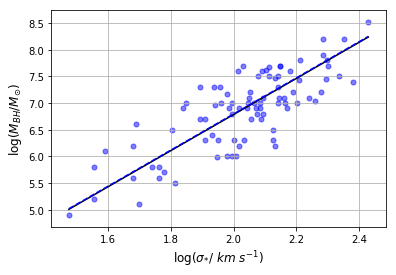

In [6]:
xp = np.linspace(np.min(x),np.max(x),500)
a1,b1,σa1,σb1 = linear(x,y,σ2)
plt.plot(xp ,a1 + (b1)*xp,"k-")
plt.plot(xp ,a1+(σa1) + (b1+σb1)*xp,"b--")
plt.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
plt.xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
plt.ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")
plt.grid(True)

Comparing with the image article

Text(0,0.5,'N')

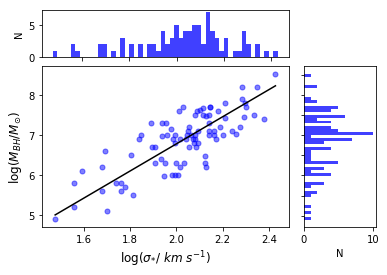

In [7]:
fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
ax_joint.plot(xp,a1 + b1*xp,"k-")

ax_marg_x.hist(x,50,facecolor = "blue",alpha = 0.75)
ax_marg_y.hist(y,50,facecolor = "blue",alpha = 0.75,orientation="horizontal")

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_joint.set_xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
ax_joint.set_ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")

ax_marg_y.set_xlabel('N')
ax_marg_x.set_ylabel('N')




<img src="figure2.png" width="350">

* Include the errors in $log_{10}\sigma_{*}$ and $log_{10}M_{BH}$ in your fit. There may be multiple errors given, use your judgement which ones to pick. How does this change your fit?

In [8]:
data["sigma*","e_sigma*","logM","e_logM","E_logM"]

sigma*,e_sigma*,logM,e_logM,E_logM
km / s,km / s,[solMass],[solMass],[solMass]
float64,float64,float64,float64,float64
140.0,27.0,7.7,0.1,--
78.4,10.0,6.7,0.1,--
98.8,16.0,6.8,0.1,--
121.0,9.4,7.0,0.1,--
216.0,30.0,7.5,0.1,--
122.0,12.0,6.7,0.1,--
174.0,12.0,7.1,0.1,--
99.2,11.0,7.0,0.1,--


Incorporating uncertainty in the $x_{i}$ in the $\chi^{2}$ fot must be handled by relating the error $\sigma_{i}^{x}$ into an additional error in the $y_{i}$ like $\sigma_{i}^{extra}$

We follow the lecture in github to implementa this error, to first order, this can be done by writing 

$$\sigma_{i}^{extra} = \left|\frac{\partial y}{\partial x}\right|\sigma_{i}^{x}$$

in this case both contribute significantly, one simply adds their squares and we choose the error "e_LogM" because the other error has a lot of zero data

$$\sigma_{i,total}^{2} = \sigma_{i}^{2}+\sigma_{i,extra}^{2}$$

Now we estimated the slope with the finite differences in the follow procedures


Text(0,0.5,'N')

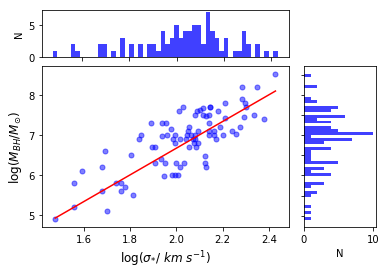

In [9]:
der = np.zeros(len(σ2))
der[1:-1] = (np.roll(y,-1)[1:-1]-np.roll(y,1)[1:-1])/(np.roll(x,-1)[1:-1]-np.roll(x,1)[1:-1])
der[0] = 0.5*(-3.0*y[0]+4.0*y[1]-y[2])/(x[1]-x[0])
der[-1] = (0.5*(3.0*y[-1]-4.0*y[-2]+y[-3])/(x[-1]-x[-2]))

σextra = np.abs(der)*σx
σ22 = σ2**2 + σextra**2


xp = np.linspace(np.min(x),np.max(x),500)
a2,b2,σa2,σb2 = linear(x,y,σ22)


fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
ax_joint.plot(xp,a2 + b2*xp,"r-")

ax_marg_x.hist(x,50,facecolor = "blue",alpha = 0.75)
ax_marg_y.hist(y,50,facecolor = "blue",alpha = 0.75,orientation="horizontal")

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_joint.set_xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
ax_joint.set_ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")

ax_marg_y.set_xlabel('N')
ax_marg_x.set_ylabel('N')



Comparing the actual plot with the plot when we won't consider the $x_{i}$ error, we have

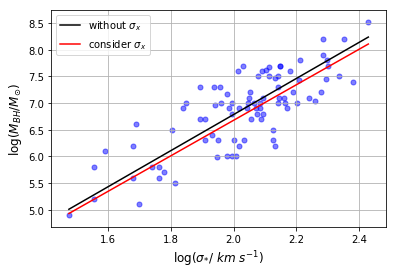

In [10]:
plt.plot(xp ,a1 + (b1)*xp,"k-",label = "without $\sigma_{x}$")
plt.plot(xp ,a2 + (b2)*xp,"r-", label = "consider $\sigma_{x}$")
plt.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
plt.xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
plt.ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")
plt.grid(True)
plt.legend()

Text(0,0.5,'N')

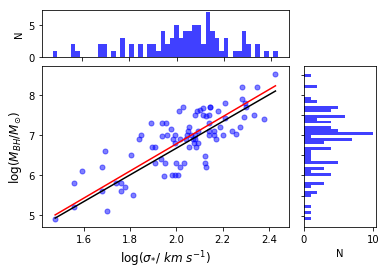

In [11]:
der = np.zeros(len(σ2))
der[1:-1] = (np.roll(y,-1)[1:-1]-np.roll(y,1)[1:-1])/(np.roll(x,-1)[1:-1]-np.roll(x,1)[1:-1])
der[0] = 0.5*(-3.0*y[0]+4.0*y[1]-y[2])/(x[1]-x[0])
der[-1] = (0.5*(3.0*y[-1]-4.0*y[-2]+y[-3])/(x[-1]-x[-2]))

σextra = np.abs(der)*σx

σ22 = σ2**2 + σextra**2
σ22

xp = np.linspace(np.min(x),np.max(x),500)
a2,b2,σa2,σb2 = linear(x,y,σ22)


fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y, c = "blue",alpha = 0.5,s = 25)
ax_joint.plot(xp,a1 + b1*xp,"r-")
ax_joint.plot(xp,a2 + b2*xp,"k-")

ax_marg_x.hist(x,50,facecolor = "blue",alpha = 0.75)
ax_marg_y.hist(y,50,facecolor = "blue",alpha = 0.75,orientation="horizontal")

plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_joint.set_xlabel('$\log(\sigma_{*}/\ km\ s^{-1})$',fontsize= "12")
ax_joint.set_ylabel('$\log(M_{BH}/M_{\odot})$',fontsize= "12")

ax_marg_y.set_xlabel('N')
ax_marg_x.set_ylabel('N')


